# Clustering techniques: Kmeans to recognize hand written digits

HandWritten Digits! Clusterize the digits

In [19]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [20]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [21]:
digits.images.shape

(1797, 8, 8)

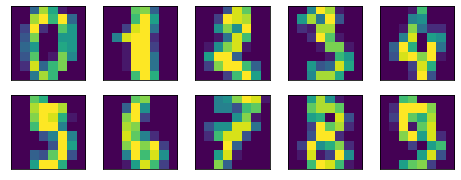

In [22]:
# Plot the first 10 samples
fig, ax = plt.subplots(2, 5, figsize=(8, 3))

for i, axi in enumerate(ax.flat):
    axi.set(xticks=[], yticks=[])
    axi.imshow(digits.images[i])

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

In [24]:
centers = kmeans.cluster_centers_.reshape(10, 8, -1)

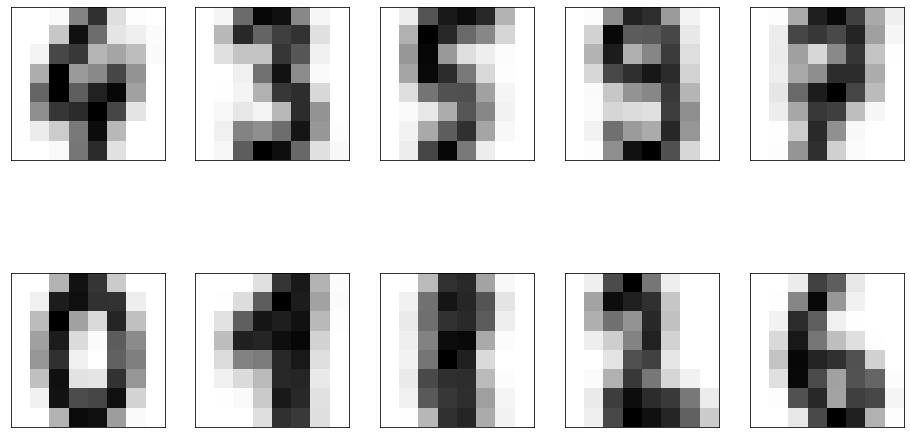

In [25]:
# Plot the first 10 samples
fig, ax = plt.subplots(2, 5, figsize=(16, 9))

for axi, centroid in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(centroid, cmap=plt.cm.binary)

The clustering assigned a cluster label to each sample. But the clustering does not know the correct label of the cluster.

In [26]:
import seaborn as sns

In [27]:
import pandas as pd
df_data = pd.DataFrame(digits.data)
df_data['target'] = digits.target
df_data['cluster'] = clusters
# df_data

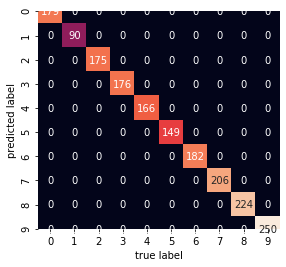

array([[179,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  90,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 175,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 176,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 166,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 149,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 182,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 206,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 224,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 250]])

In [45]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(digits.target, labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

mat

In [29]:
from scipy.stats import mode
labels = np.zeros_like(clusters)

for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [33]:
digits.target = labels

Text(0.5, 1.0, '7')

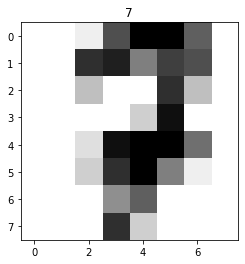

In [34]:
plt.imshow(df_data.drop(['cluster', 'target'], axis=1).iloc[300, :].values.reshape(8,8), cmap=plt.cm.binary)
plt.title(df_data.loc[300, 'cluster'])

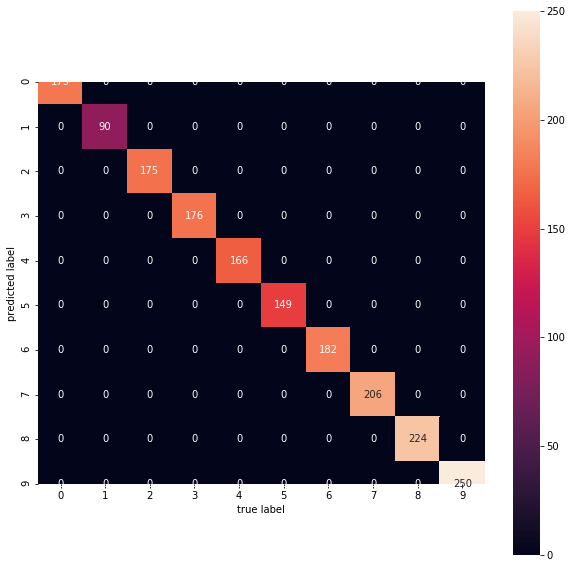

array([[179,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  90,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 175,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 176,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 166,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 149,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 182,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 206,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 224,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 250]])

In [46]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(digits.target, labels)
plt.figure(figsize=(10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
mat